In [2]:
from pymongo import MongoClient
from dotenv import load_dotenv
import os
import pandas as pd


# Load environment variables from .env file
load_dotenv()

# Get MongoDB credentials from environment variables
MONGO_URI = os.getenv("MONGO_URI")
MONGO_DB = os.getenv("MONGO_DB")


# Connect to MongoDB
client = MongoClient(MONGO_URI)
db = client[MONGO_DB]





In [3]:
albums_df = pd.DataFrame(list(db.albums.find()))
artists_df = pd.DataFrame(list(db.artists.find()))
tracks_df = pd.DataFrame(list(db.tracks_metadata.find()))


In [4]:
print("Albums:", albums_df.columns)
print("Artists:", artists_df.columns)
print("Tracks:", tracks_df.columns)


Albums: Index(['_id', 'name', 'artist', 'url', 'playcount', 'listeners', 'tags',
       'images', 'tracks', 'wiki_summary'],
      dtype='object')
Artists: Index(['_id', 'name', 'tags', 'similar_artists', 'wiki', 'musicbrainz_id'], dtype='object')
Tracks: Index(['_id', 'artist', 'track', 'album', 'metadata'], dtype='object')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\3906604938.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_albums, x="name", y="playcount", palette="Blues_d")


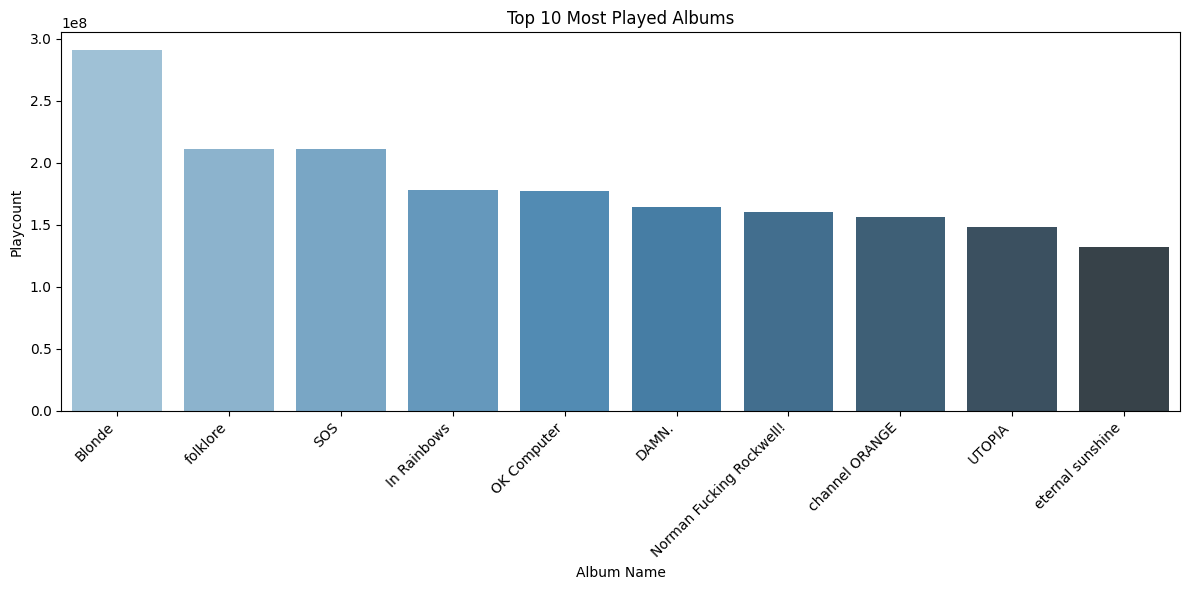

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'playcount' is numeric
albums_df["playcount"] = pd.to_numeric(albums_df["playcount"], errors="coerce")

# Drop NaNs and sort
top_albums = albums_df.dropna(subset=["playcount"]).sort_values(by="playcount", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_albums, x="name", y="playcount", palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Played Albums")
plt.xlabel("Album Name")
plt.ylabel("Playcount")
plt.tight_layout()
plt.show()



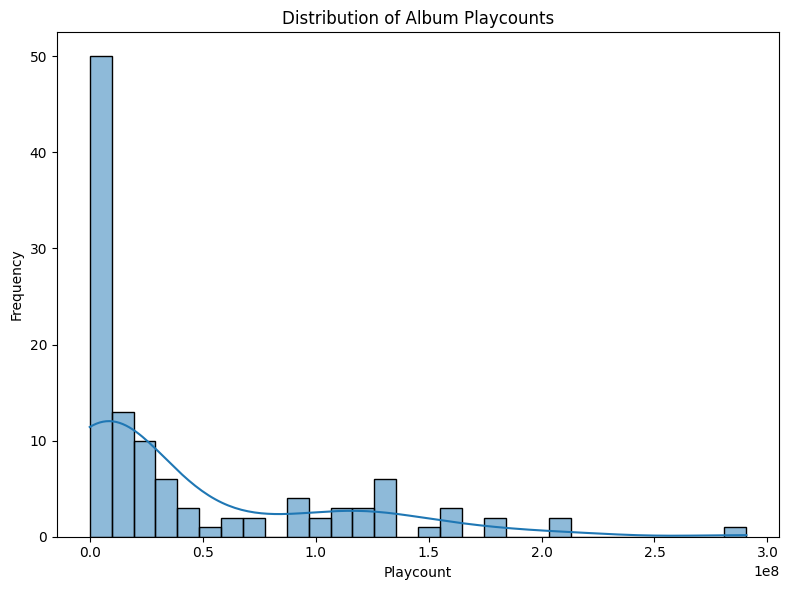

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(albums_df["playcount"], bins=30, kde=True)
plt.title("Distribution of Album Playcounts")
plt.xlabel("Playcount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\438777954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_by_listeners, x="name", y="listeners", palette="coolwarm")


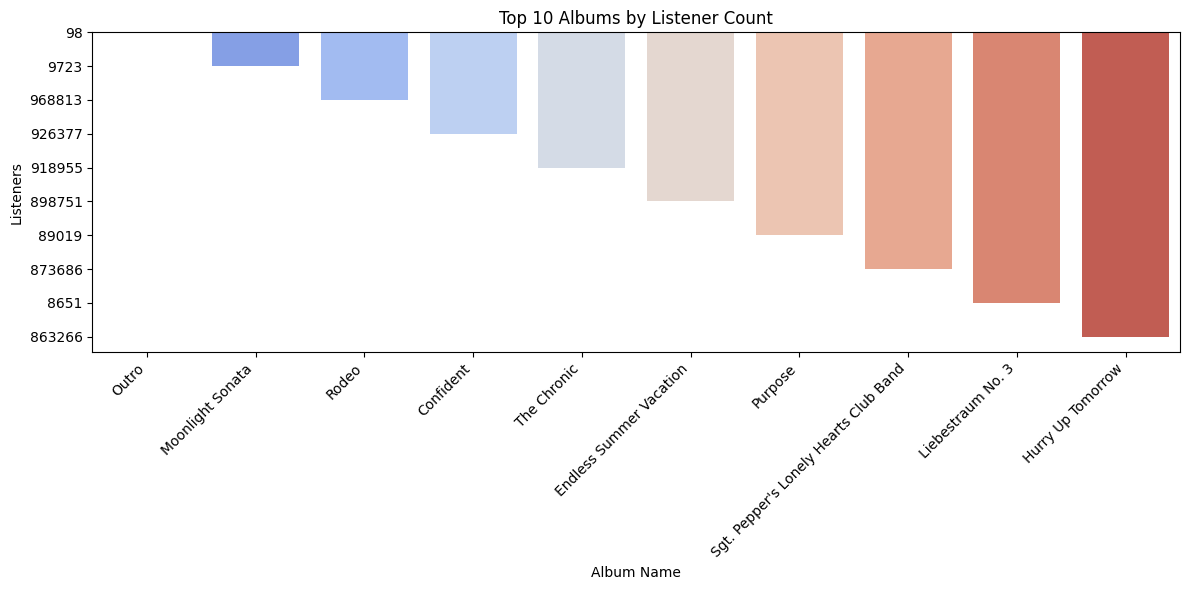

In [8]:
top_by_listeners = albums_df.sort_values(by="listeners", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_by_listeners, x="name", y="listeners", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Albums by Listener Count")
plt.xlabel("Album Name")
plt.ylabel("Listeners")
plt.tight_layout()
plt.show()


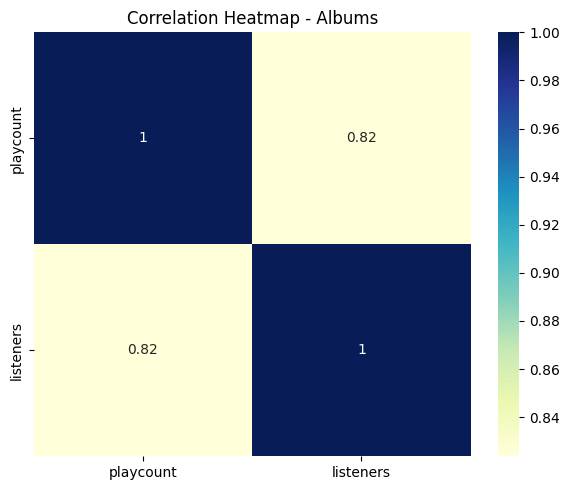

In [9]:
numeric_cols = albums_df[["playcount", "listeners"]]
plt.figure(figsize=(6, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap - Albums")
plt.tight_layout()
plt.show()


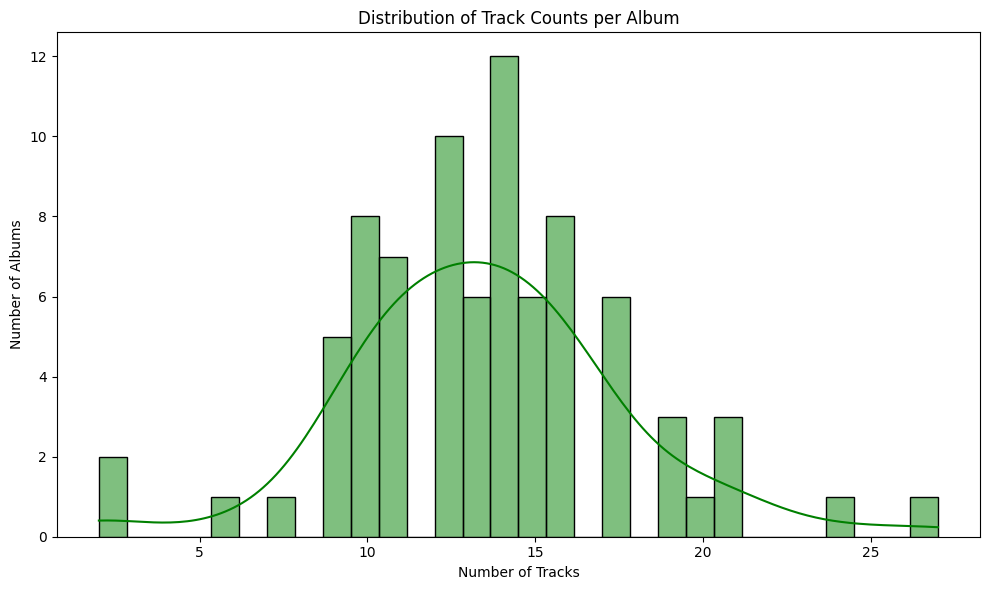

In [10]:
track_counts = tracks_df["album"].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(track_counts, bins=30, kde=True, color="green")
plt.title("Distribution of Track Counts per Album")
plt.xlabel("Number of Tracks")
plt.ylabel("Number of Albums")
plt.tight_layout()
plt.show()


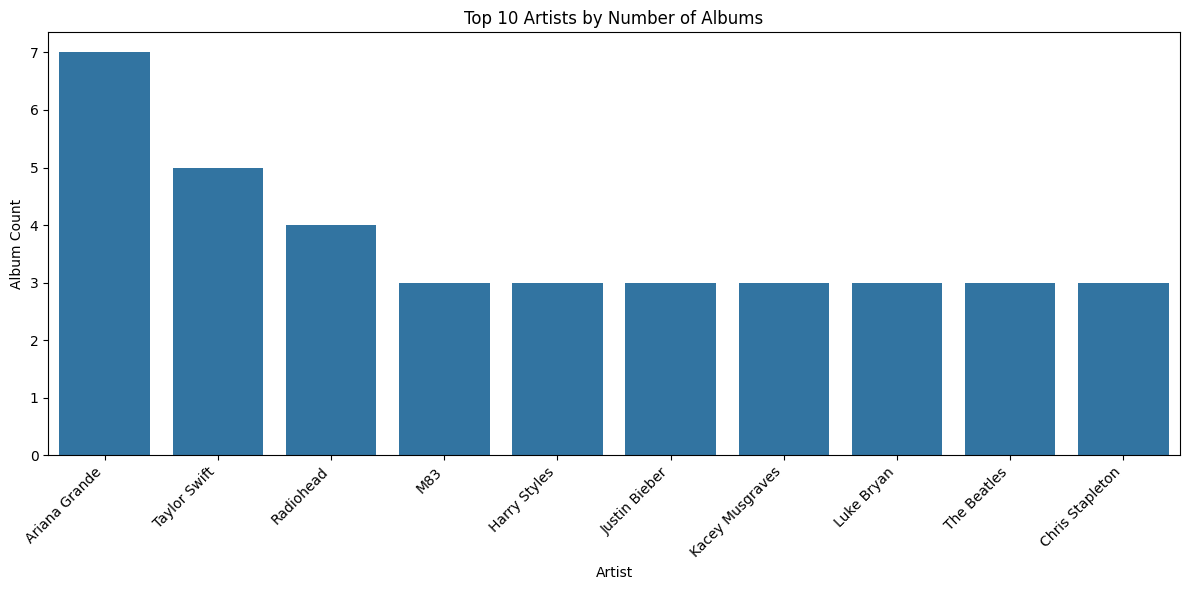

In [11]:
# Albums per artist
albums_per_artist = albums_df.groupby("artist").agg({
    "playcount": "sum",
    "listeners": "sum",
    "_id": "count"  # album count
}).rename(columns={"_id": "album_count"}).reset_index()

# Top 10 most productive artists by album count
top_album_artists = albums_per_artist.sort_values(by="album_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_album_artists, x="artist", y="album_count")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Artists by Number of Albums")
plt.xlabel("Artist")
plt.ylabel("Album Count")
plt.tight_layout()
plt.show()


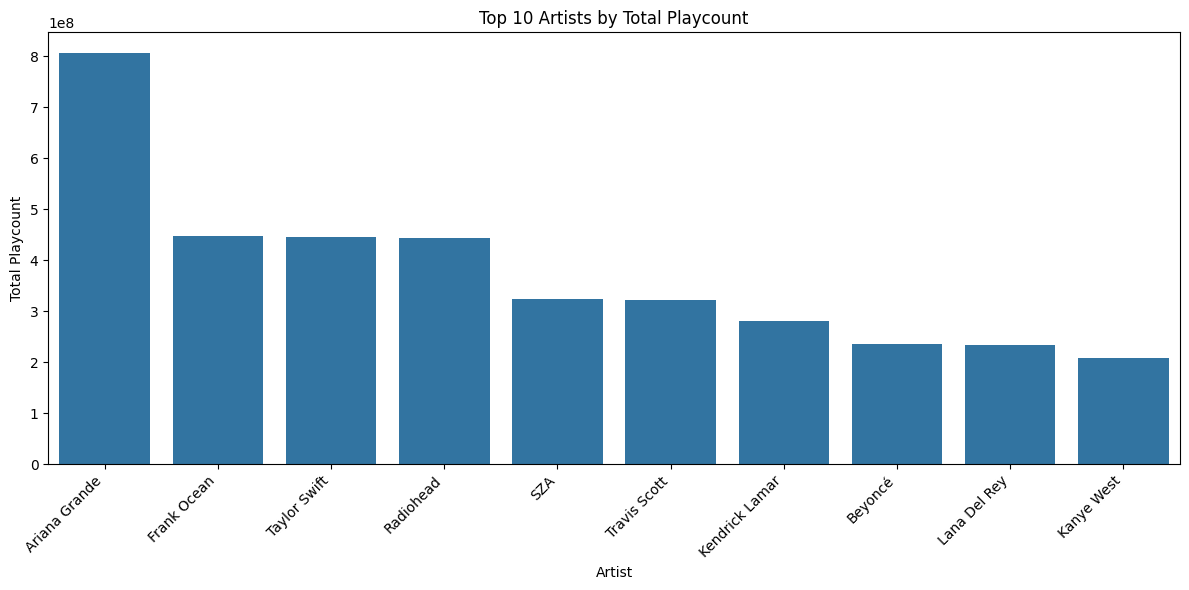

In [12]:
top_play_artists = albums_per_artist.sort_values(by="playcount", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_play_artists, x="artist", y="playcount")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Artists by Total Playcount")
plt.xlabel("Artist")
plt.ylabel("Total Playcount")
plt.tight_layout()
plt.show()


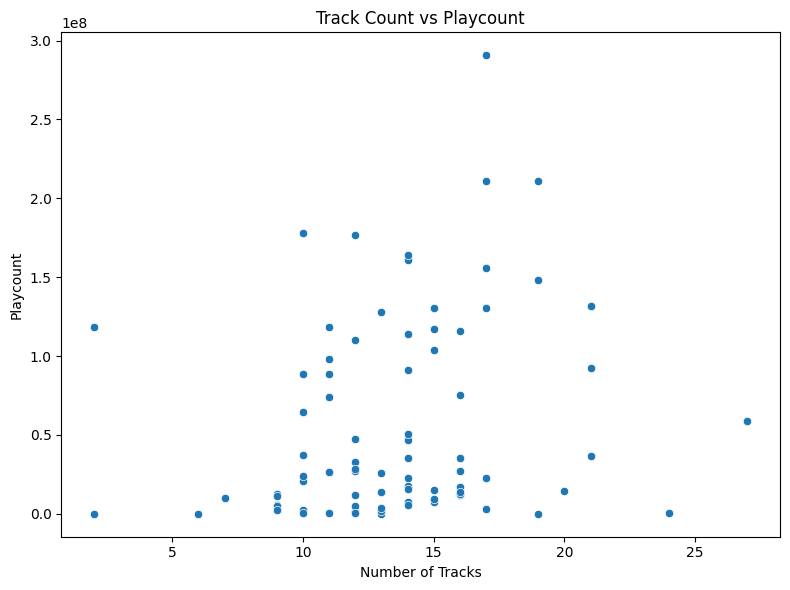

In [13]:
# Tracks per album
tracks_per_album = tracks_df["album"].value_counts().reset_index()
tracks_per_album.columns = ["album", "track_count"]

# Merge with albums for playcount/listeners
album_track_stats = pd.merge(albums_df, tracks_per_album, left_on="name", right_on="album", how="left")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=album_track_stats, x="track_count", y="playcount")
plt.title("Track Count vs Playcount")
plt.xlabel("Number of Tracks")
plt.ylabel("Playcount")
plt.tight_layout()
plt.show()


In [14]:
# Summary table for artists
artist_stats = albums_per_artist.describe().round(2)
print(artist_stats)


          playcount  album_count
count  5.200000e+01        52.00
mean   9.474234e+07         2.19
std    1.610442e+08         1.07
min    0.000000e+00         1.00
25%    2.565382e+05         2.00
50%    2.561918e+07         2.00
75%    1.121414e+08         3.00
max    8.066274e+08         7.00


In [15]:
# Find albums with unusually high playcounts
Q1 = albums_df["playcount"].quantile(0.25)
Q3 = albums_df["playcount"].quantile(0.75)
IQR = Q3 - Q1

outliers = albums_df[albums_df["playcount"] > Q3 + 1.5 * IQR]
print("High Playcount Outliers:\n", outliers[["name", "artist", "playcount"]])


High Playcount Outliers:
            name        artist  playcount
9   In Rainbows     Radiohead  177977883
15          SOS           SZA  210791357
22       Blonde   Frank Ocean  290703454
45     folklore  Taylor Swift  211132548


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\3996308226.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_df, x="tag", y="count", palette="viridis")


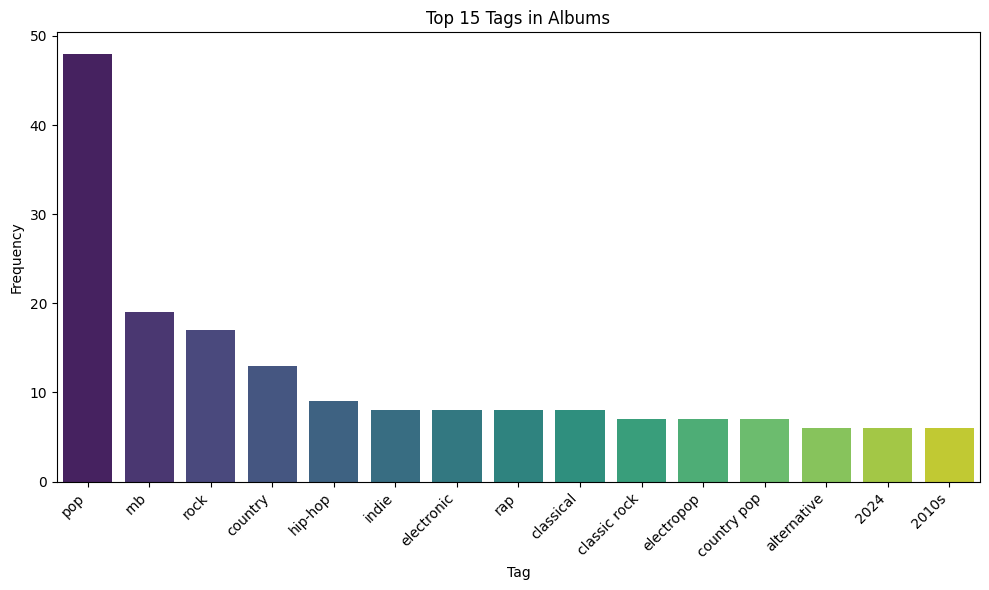

In [16]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten album tags
album_tags = sum(albums_df["tags"].dropna(), [])
tag_counts = Counter(album_tags).most_common(15)

# Convert to DataFrame
tag_df = pd.DataFrame(tag_counts, columns=["tag", "count"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tag_df, x="tag", y="count", palette="viridis")
plt.title("Top 15 Tags in Albums")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\3292007436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_tag_df, x="tag", y="count", palette="coolwarm")


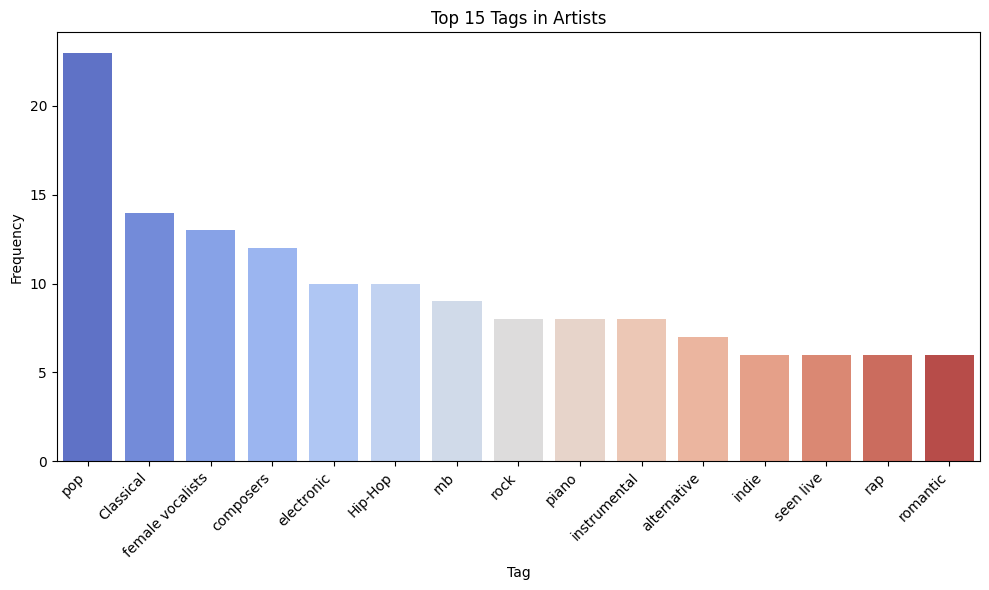

In [17]:
# Flatten artist tags
artist_tags = sum(artists_df["tags"].dropna(), [])
artist_tag_counts = Counter(artist_tags).most_common(15)

artist_tag_df = pd.DataFrame(artist_tag_counts, columns=["tag", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=artist_tag_df, x="tag", y="count", palette="coolwarm")
plt.title("Top 15 Tags in Artists")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [18]:
album_tag_set = set(album_tags)
artist_tag_set = set(artist_tags)

shared_tags = album_tag_set & artist_tag_set
only_in_albums = album_tag_set - artist_tag_set
only_in_artists = artist_tag_set - album_tag_set

print("Total shared tags:", len(shared_tags))
print("Example shared tags:", list(shared_tags)[:10])


Total shared tags: 50
Example shared tags: ['singer-songwriter', 'acoustic', 'modern country', 'soul', 'better than selena gomez', 'french', 'idm', 'female vocalists', 'ambient', 'pop rock']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\2925500976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_tag_playcounts.index, y=album_tag_playcounts.values, palette="magma")


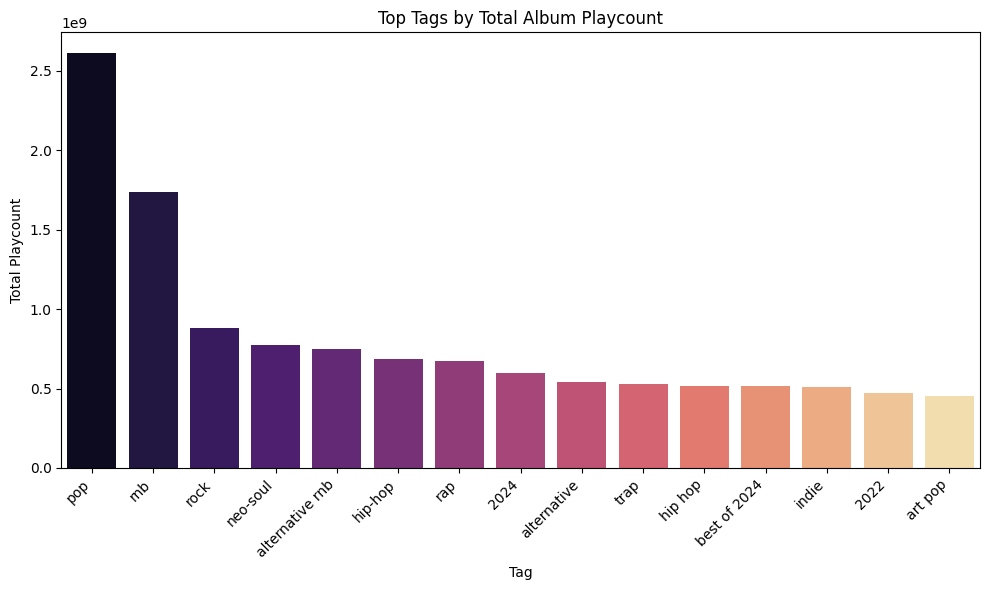

In [19]:
# Explode tags and sum playcounts
album_tag_playcounts = albums_df.explode("tags").groupby("tags")["playcount"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=album_tag_playcounts.index, y=album_tag_playcounts.values, palette="magma")
plt.title("Top Tags by Total Album Playcount")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tag")
plt.ylabel("Total Playcount")
plt.tight_layout()
plt.show()


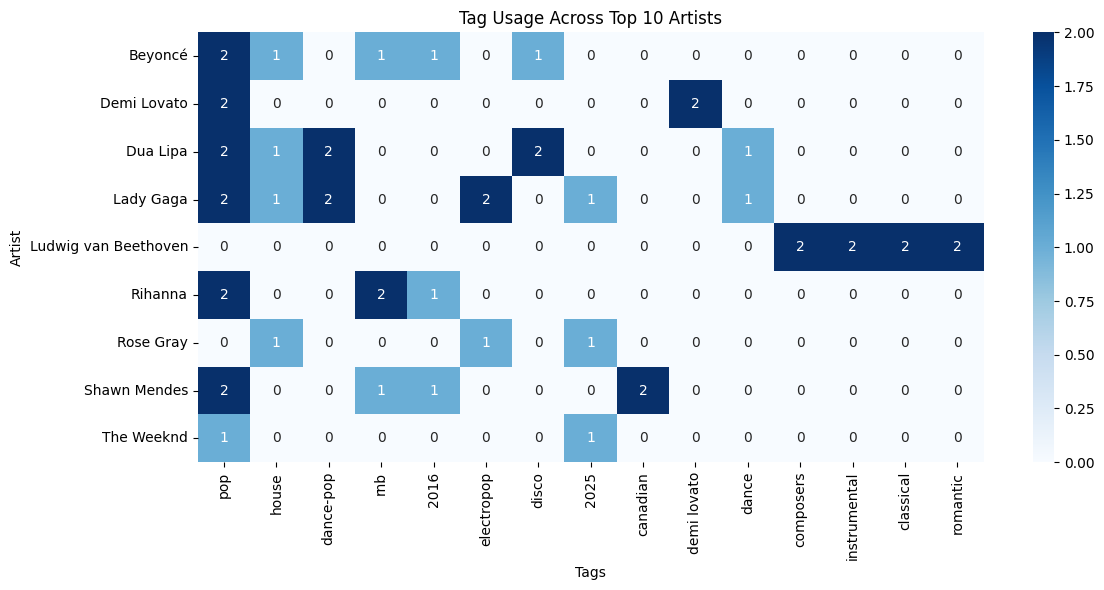

In [20]:
# Get top 10 artists by total listeners
top_artists = albums_df.groupby("artist")["listeners"].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter albums and explode tags
top_artist_albums = albums_df[albums_df["artist"].isin(top_artists)]
exploded = top_artist_albums.explode("tags")

# Create pivot table: artist vs tag counts
tag_pivot = exploded.pivot_table(index="artist", columns="tags", aggfunc="size", fill_value=0)

# Keep only top 15 tags used by these artists
top_tags = tag_pivot.sum().sort_values(ascending=False).head(15).index
filtered = tag_pivot[top_tags]

plt.figure(figsize=(12, 6))
sns.heatmap(filtered, annot=True, fmt="d", cmap="Blues")
plt.title("Tag Usage Across Top 10 Artists")
plt.xlabel("Tags")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\58242388.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_similar, x="name", y="similar_count", palette="crest")


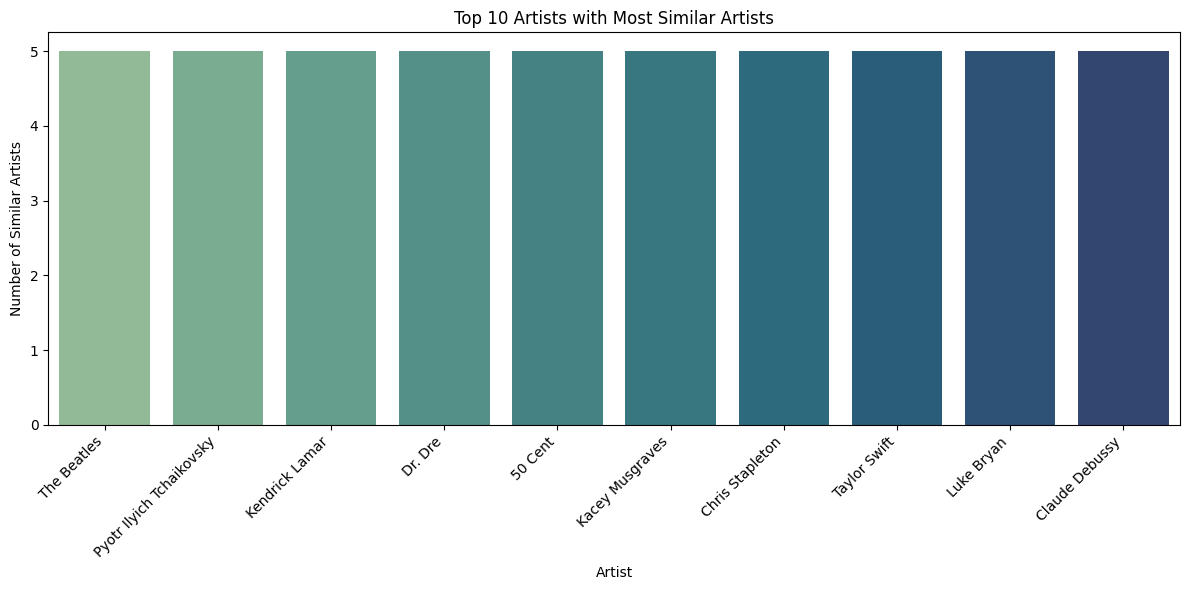

In [21]:
# Count how many similar artists each artist has
artists_df["similar_count"] = artists_df["similar_artists"].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Top 10 most connected
top_similar = artists_df.sort_values(by="similar_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_similar, x="name", y="similar_count", palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Artists with Most Similar Artists")
plt.xlabel("Artist")
plt.ylabel("Number of Similar Artists")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\1061490521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=track_counts, x="album", y="track_count", palette="plasma")


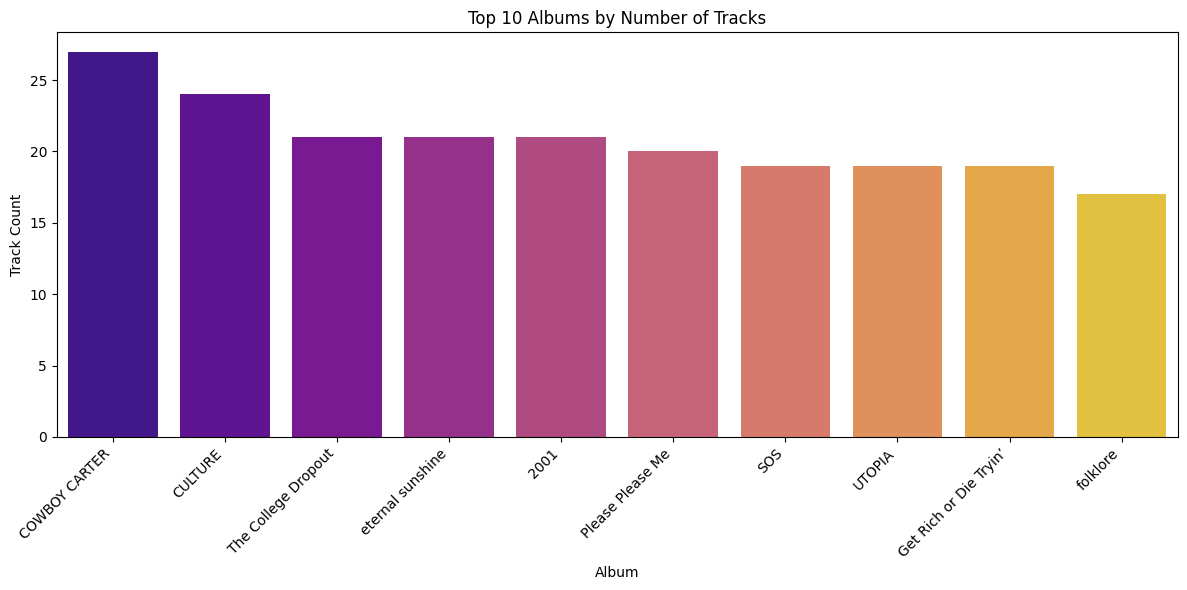

In [22]:
track_counts = tracks_df["album"].value_counts().head(10).reset_index()
track_counts.columns = ["album", "track_count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=track_counts, x="album", y="track_count", palette="plasma")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Albums by Number of Tracks")
plt.xlabel("Album")
plt.ylabel("Track Count")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\2845399237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_track_counts, x="artist", y="track_count", palette="light:#5A9")


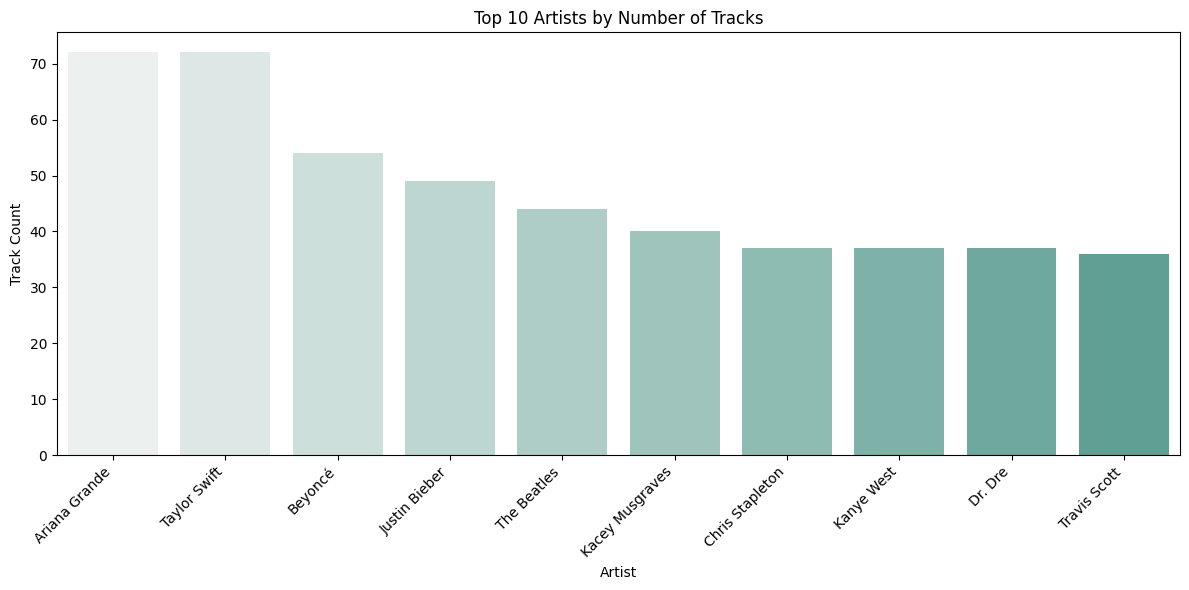

In [23]:
artist_track_counts = tracks_df["artist"].value_counts().head(10).reset_index()
artist_track_counts.columns = ["artist", "track_count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=artist_track_counts, x="artist", y="track_count", palette="light:#5A9")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.tight_layout()
plt.show()


count    114.000000
mean       4.175439
std        1.830158
min        0.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: tag_count, dtype: float64


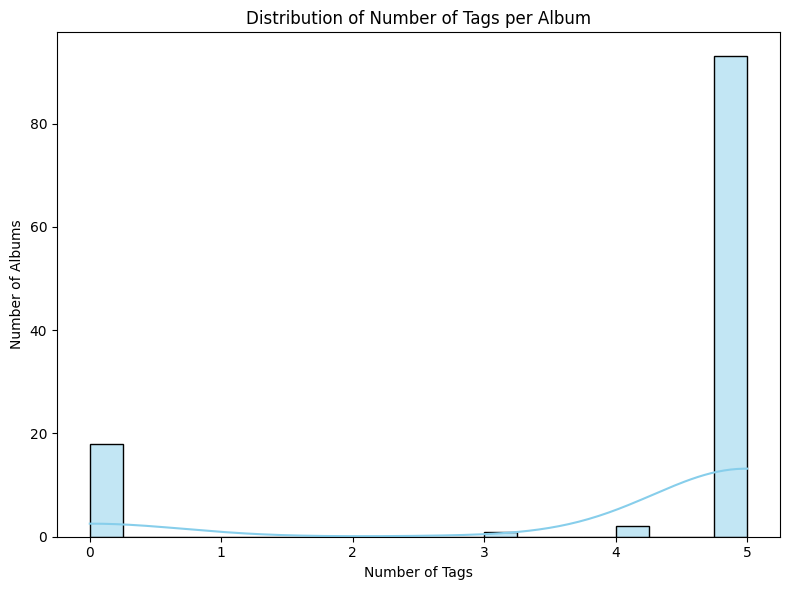

In [24]:
# Ensure tags are lists and not NaN
albums_df["tag_count"] = albums_df["tags"].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Basic statistics
print(albums_df["tag_count"].describe())

# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(albums_df["tag_count"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Number of Tags per Album")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Albums")
plt.tight_layout()
plt.show()


In [26]:
top_tagged_albums = albums_df.sort_values("tag_count", ascending=False)[["name", "tag_count"]].head(10)
top_tagged_artists = artists_df.sort_values("tag_count", ascending=False)[["name", "tag_count"]].head(10)

print("🎧 Top Tagged Albums:")
print(top_tagged_albums)

print("\n🎤 Top Tagged Artists:")
print(top_tagged_artists)


🎧 Top Tagged Albums:
                           name  tag_count
0              Please Please Me          5
48                     Unbroken          5
74  Same Trailer Different Park          5
73                  Golden Hour          5
72                       UTOPIA          5
70                   ASTROWORLD          5
69                 The Massacre          5
67                  The Chronic          5
66                         2001          5
65                        DAMN.          5

🎤 Top Tagged Artists:
               name  tag_count
0       The Beatles          5
1             AC/DC          5
31          Dr. Dre          5
32          50 Cent          5
33     Travis Scott          5
34  Kacey Musgraves          5
35  Chris Stapleton          5
36     Taylor Swift          5
37       Luke Bryan          5
38   Claude Debussy          5


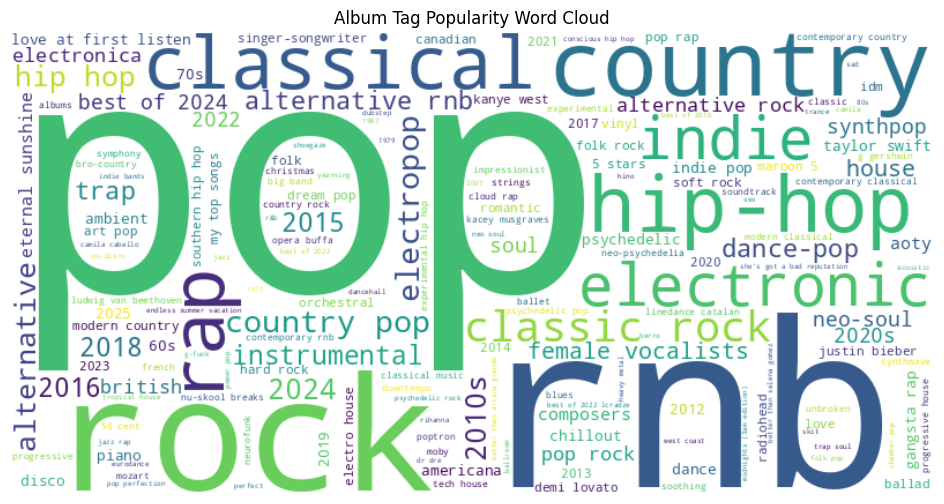

In [27]:
from wordcloud import WordCloud

# Combine all tags from albums
all_album_tags = [tag for tags in albums_df["tags"] if isinstance(tags, list) for tag in tags]
tag_freq_album = pd.Series(all_album_tags).value_counts().to_dict()

# Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_freq_album)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Album Tag Popularity Word Cloud")
plt.show()


In [32]:
# Ensure listeners is numeric
albums_df["listeners"] = pd.to_numeric(albums_df["listeners"], errors="coerce")

# Drop rows with missing listener data (optional)
albums_df = albums_df.dropna(subset=["listeners"])

# Create quantile-based bins
albums_df["listener_bin"] = pd.qcut(albums_df["listeners"], q=5, labels=[
    "Very Low", "Low", "Medium", "High", "Very High"
])


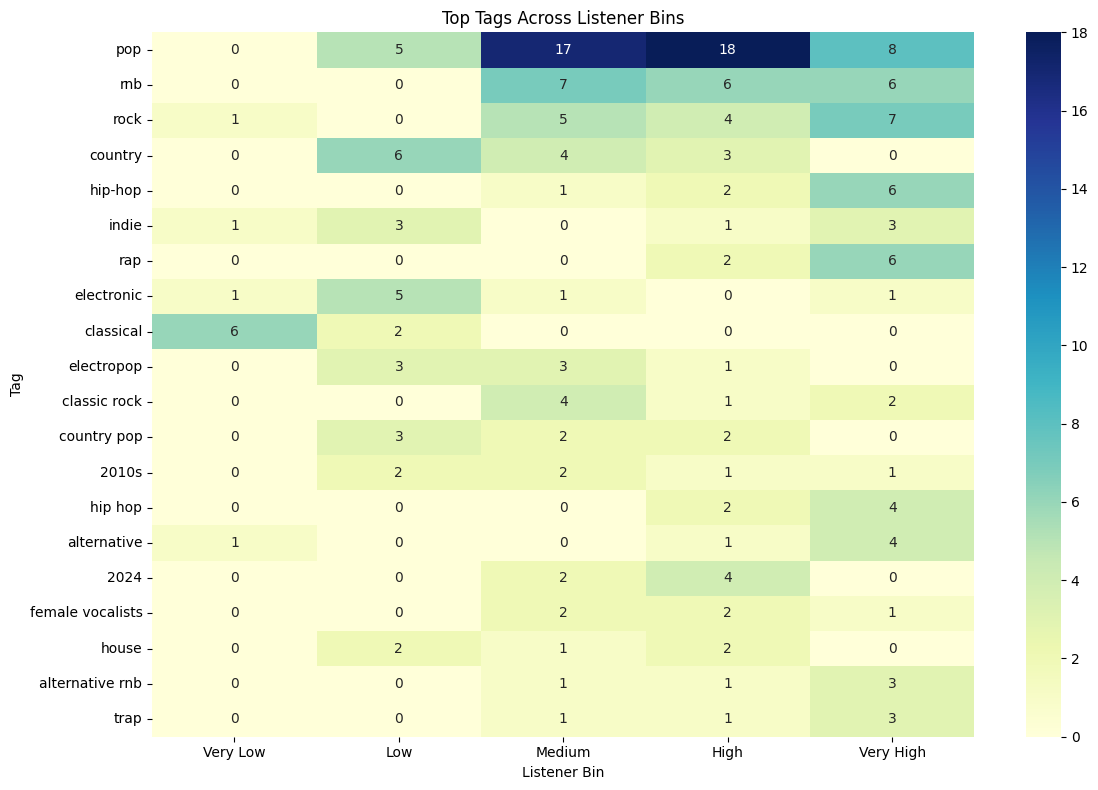

In [33]:
# Use binned listener data from before
albums_df["listener_bin"] = pd.qcut(albums_df["listeners"], q=5, labels=[
    "Very Low", "Low", "Medium", "High", "Very High"
])

# Explode tags for analysis
exploded = albums_df.explode("tags")

# Cross-tab of tag counts vs listener bins
tag_bin_matrix = pd.crosstab(exploded["tags"], exploded["listener_bin"])

# Filter to top N tags for clarity
top_tags = tag_bin_matrix.sum(axis=1).sort_values(ascending=False).head(20).index
filtered = tag_bin_matrix.loc[top_tags]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Top Tags Across Listener Bins")
plt.xlabel("Listener Bin")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()


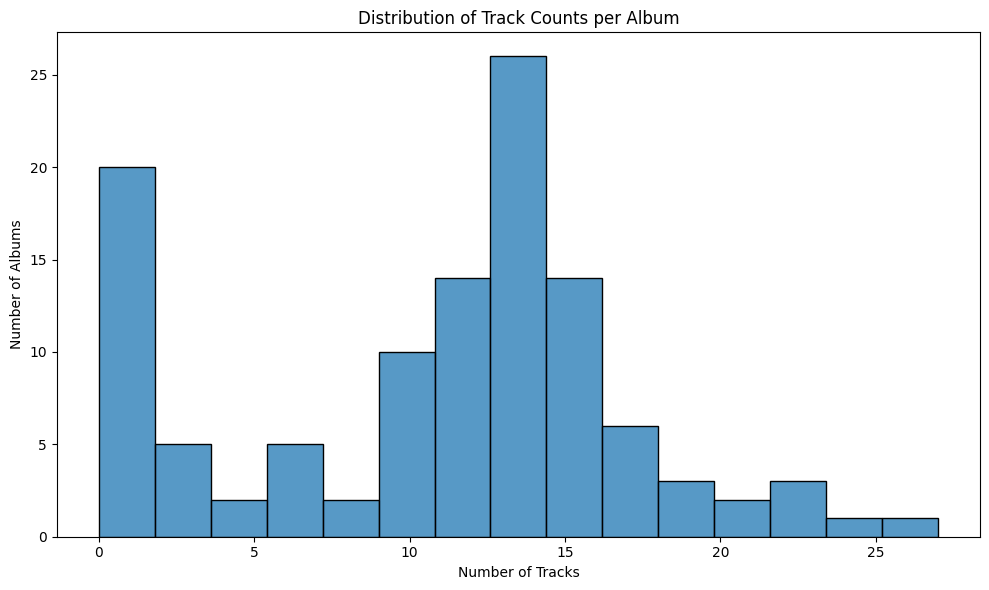

In [30]:
albums_df["track_count"] = albums_df["tracks"].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(albums_df["track_count"], bins=15, kde=False)
plt.title("Distribution of Track Counts per Album")
plt.xlabel("Number of Tracks")
plt.ylabel("Number of Albums")
plt.tight_layout()
plt.show()
